# Podstawy programowania (AD) 2

## Tomasz Rodak

Wykład XI

---

# Iteracje po kolekcjach

## Wprowadzenie

W języku Python istnieją dwie jawne instrukcje złożone pozwalające na prowadzenie iteracji:
* `while` - forma instrukcji wyboru, tyle że z powtórzeniami. Stan zmiennych z fragmentu kodu objętego instrukcją jest testowany w warunku instrukcji i od tego zależy liczba obrotów pętli.
* `for` - iteracja biegnie po kolekcji.

Czym są te "kolekcje", po których może iterować instrukcja `for`? Właśnie o tym teraz opowiemy.

Popatrzmy na przykłady:

```python
>>> k1 = [3, 1, 2, 4]
>>> k2 = range(10)
>>> k3 = reversed('ala ma kota')
```

Są to obiekty różnych typów, więc w różny sposób się przedstawiają. Wiemy już, że sposób prezentacji obiektu zależy od wbudowanych metod `.__repr__()` i `.__str__()`:

```python
>>> k1
[3, 1, 2, 4]
>>> k2
range(0, 10)
>>> k3
<reversed at 0x7f298cbff340>
```

Postać `k1` jest całkowicie jawna, wszystkie elementy zostały wypisane. Elementy `k2` są ukryte, można je jednak wydedukowć. Przedstawienie `k3` jest najbardziej enigmatyczne. Jak uzyskać dostęp do zawartości tych obiektów? Każdy z nich jest *obiektem iterowalnym*, co oznacza że można wykonać na nim iterację instrukcją `for`: 

```python
>>> for x in k1:
...    print(x, end=' ')
3 1 2 4
>>> for x in k2:
...    print(x, end=' ')
0 1 2 3 4 5 6 7 8 9
>>> for x in k3:
...    print(x, end=' ')
a t o k   a m   a l a
```

Funkcje `list()`, `tuple()` i inne tym podobne wykonują iterację po kolekcji niejawnie wypakowując ją do obiektu odpowiedniego typu:

```python
>>> tuple(k1)
(3, 1, 2, 4)
>>> tuple(k2)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
>>> tuple(k3)
()
```

Co tu się stało? Wygląda na to, że obiekt `k3` jest pusty! Powtórzmy test:

```python
>>> k3 = reversed('ala ma kota')
>>> k3
<reversed at 0x7f298cbff640>
>>> tuple(k3)
('a', 't', 'o', 'k', ' ', 'a', 'm', ' ', 'a', 'l', 'a')
>>> tuple(k3)
()
```

Gdy tymczasem:

```python
>>> k2 = range(10)
>>> k2
range(0, 10)
>>> tuple(k2)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
>>> tuple(k2)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
```

Każdy z obiektów `k1`, `k2`, `k3` jest iterowalny, ale tylko `k3` jest *iteratorem*.

## Iteratory

*Iterator* to obiekt reprezentujący strumień danych. Każdy iterator powinien posiadać metody `.__next__()` i `.__iter__()`, przy czym metoda `.__iter__()` powinna mieć banalną postać:
```python
def __iter__(self):
    return self
```

Metoda `.__next__()` zwraca kolejne elementy z iteratora. Po wyczerpaniu strumienia `.__next__()` rzuca wyjątek `StopIteration`. Wbudowana funkcja `next()` automatycznie wywołuje metodę `.__next__()`:

```python
>>> it = reversed('abc')
>>> it
<reversed at 0x7f298cbff640>
>>> next(it)
'c'
>>> next(it)
'b'
>>> next(it)
'a'
>>> next(it)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
StopIteration
```

Instrukcja `for` czy funkcje niejawnie wykonujące iteracje po kolekcjach automatycznie obsługują wyjątek `StopIteration`:

```python
>>> it = reversed('abc')
>>> next(it)
'c'
>>> next(it)
'b'
>>> next(it)
'a'
>>> tuple(it)
()
```

Zakres `range()`, lista, krotka, słownik, zbiór itd., nie są iteratorami:

```python
>>> z = range(5)
>>> z
range(0, 5)
>>> next(z)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: 'range' object is not an iterator
```

Oto przykłady kilku funkcji wbudowanych zwracających iteratory:
* `iter()`
* `enumerate()`
* `reversed()`
* `zip()`
* `map()`
* `filter()`
* `open()`

Ważną cechą iteratorów jest to, że są *leniwe* - produkują wartości tylko na na żądanie. Z tego powodu iteratory zajmują tę samą, bardzo małą, ilość pamięci bez względu na to, ile wartości są w stanie zwrócić. Wkrótce się przekonasz, że liczba wartości przechoywanych przez iterator może być nawet nieskończona.

Iterator można przebiec tylko raz. Przykłady widzieliśmy wyżej. Po wyczerpaniu jest bezużyteczny. Ponadto, po iteratorze można biec tylko w jedną stronę - wykorzystując funkcję `next()` (jest to nie do końca prawda w odniesieniu do wartości zwracanych przez `open()`). Wartości pobrane, jeśli nie zostaną zapamiętane, przepadają.

Iterator nie posiada metod `.__getitem__()` ani `.__len__()`. Nie jest więc sekwencją i nie można obliczyć jego długości inaczej niż iterując po nim i zliczając wartości, doprowadzając równocześnie do jego wyczerpania.

```python
>>> r = reversed('abc')
>>> r
<reversed at 0x7f298cbff640>
>>> r[1]
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: 'reversed' object is not subscriptable
>>> len(r)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: object of type 'reversed' has no len()
```

## Obiekty iterowalne

*Obiekt iterowalny* to dowolny obiekt, z którego wbudowana funkcja `iter()` może uzyskać iterator. Równoważnie, obiekt iterowalny to taki, po którym można przebiec pętlą `for`.

Iterator jest obiektem iterowalnym, gdyż posiada metodę `.__iter__()` postaci:
```python
def __iter__(self):
    return self
```
Funkcja `iter()` automatycznie wywołuje metodę `.__iter__()`, która w przypadku iteratora zwróci `self`, czyli właśnie ten iterator.

Przykłady obiektów iterowalnych:

* listy, łańcuchy, krotki;
* słowniki, zbiory;
* zakresy `range()`;
* obiekty zwracane przez `zip()`, `map()`, `filter()`, `reversed()`, `enumerate()`, ...
* ogólnie, wszystkie iteratory;
* obiekty posiadające metodę `.__iter__()`;
* obiekty implementujące metodę `.__getitem__()` przyjmującą indeksy zaczynające się od zera

Teraz możemy dokładnie prześledzić wzorzec iteracji instrukcją `for`.
Iteracja na obiekcie iterowalnym polega na utworzeniu jego iteratora, a następnie wywoływaniu na nim `next()`, aż do wystąpienia wyjątku `StopIteration`.

A zatem pętla
```python
for element in obiekt_iterowalny:
    <instrukcje>
```
sprowadza się do
```python
it = iter(obiekt_iterowalny)

while True:
    try:
        element = next(it)
    except StopIteration:
        del it
        break
    <instrukcje>
```
Podobnie
```python
lst = list(obiekt_iterowalny)
```
jest tym samym co
```python
lst = []

it = iter(obiekt_iterowalny)

while True:
    try:
        element = next(it)
    except StopIteration:
        del it
        break
    lst.append(element)
```

### Podsumowanie

#### Iterator

* **Iterator** to obiekt implementujący metody `__next__(self)` oraz `__iter__(self)`.
* Metoda `__next__()` zwraca kolejny element lub wywołuje wyjątek `StopIteration`, gdy nie ma już więcej elementów.
* Metoda `__iter__()` powinna mieć postać:
  ```python
  def __iter__(self):
      return self
  ```
* Dzięki implementacji `__iter__()` iterator jest obiektem iterowalnym.
* Iterator jest **leniwy**: produkuje wartości na żądanie.
* Iterator można przebiec **tylko raz**. Po wyczerpaniu jest bezużyteczny.

#### Obiekt iterowalny

* **Obiekt iterowalny** to dowolny obiekt, z którego funkcja `iter()` może uzyskać iterator. 
* Obiektami iterowalnymi są:
  * obiekty implementujące metodę `__iter__()`,
  * obiekty implementujące metodę `__getitem__()` przyjmującą indeksy zaczynające się od zera.
  * w szczególności iterowalne są: sekwencje, słowniki, zbiory, strumienie plików i praktycznie wszystkie kontenery z biblioteki standardowej.
* Obiekt iterowalny zawsze może wystąpić w pętli `for`:
  ```python
  for element in obiekt_iterowalny:
      ...
  ```

## Tworzenie iteratorów za pomocą klas

Klasa tworzy iteratory, gdy posiada metody

* `.__next__(self)`
* `.__iter__(self)`

przy czym `.__iter__()` musi być postaci
```python
def __iter__(self):
    return self
```

### Kwadraty

Iteratory zwracają elementy jedynie na żądanie, mogą więc reprezentować obiekty faktycznie nieskończone.

Napiszmy klasę `Kwadraty` zwracającą iterator zawierający wszystkie liczby naturalne będące kwadratami, czyli `0, 1, 4, 9, 16, ...`

Atrybut `.licznik` przechowuje stan iteratora. Zadaniem metody `.__next__()` jest aktualizacja stanu iteratora i zwrócenie kolejnej wartości. Gdy tworzony jest nowy  obiekt przez wywołanie `Kwadraty()`, uruchamiana jest metoda `.__init__()`. Ponieważ `.__next__()` musi zaktualizować `.licznik` **przed** zwróceniem wartości, więc `.__init__()` ustawia `.licznik` na `-1`. W przeciwnym razie nie uzyskamy zera jako pierwszego kwadratu (a tego wymagają testy).

In [ ]:
class Kwadraty:
    
    def __init__(self):
        self._n = 0
        
    def __next__(self):
        n = self._n
        self._n += 1
        return n ** 2
    
    def __iter__(self):
        return self

### PostępArytmetyczny

Napiszemy klasę `PostępArytmetyczny` zwracającą iteratory z postępem arytmetycznym o zadanym wyrazie początkowym, różnicy i liczbie wyrazów.

Tutaj zasada jest podobna jak w przykładzie Kwadraty. Różnica polega przede wszystkim na tym, że teraz iteratory są skończone. Dlatego metoda `.__next__()` musi aktualizować stan i zwracać wartość, ale również sprawdzać, czy iterator nie został już wyczerpany. Jeśli tak, to rzuca wyjątek `StopIteration`.

In [ ]:
class PostępArytmetyczny:
    
    def __init__(self, a, r, n):
        self.a, self.r, self.n = a, r, n
        self._k, self._w = 0, a
    
    def __repr__(self):
        return 'PostępArytmetyczny(a={}, r={}, n={})'.format(self.a, self.r, self.n)
    
    def __next__(self):
        if self._k == self.n:
            raise StopIteration
        
        w = self._w
        self._k += 1
        self._w += self.r
        return w
        
    def __iter__(self):
        return self

```python
>>> p = PostępArytmetyczny(10, -1.5, 8)
>>> p
PostępArytmetyczny(a=10, r=-1.5, n=8)
>>> for x in p:
...     print(x, end=' ')
10 8.5 7.0 5.5 4.0 2.5 1.0 -0.5
```

## Generatory

*Funkcja generatora* to funkcja, która zawiera w swoim ciele słowo zarezerwowane **`yield`**. Użycie funkcji generatora znakomicie upraszcza pisanie własnych iteratorów. Funkcje generatora zwracają iteratory, nazywa się je czasem *generatorami*.

Przykład. Chcemy utworzyć iterator powtarzający zadaną sekwencję żądaną liczbę razy:

Utworzymy go dwoma sposobami: pisząc klasę i funkcję generatora.

Klasa:

In [ ]:
class Powtarzaj:
    
    def __init__(self, seq, n_powt=1):
        self._seq = seq
        self._len = n_powt * len(seq)
        self._licznik = 0
    
    def __next__(self):
        while True:
            if self._licznik == self._len:
                raise StopIteration

            v = self._seq[self._licznik % len(self._seq)]
            self._licznik += 1
            return v
    
    def __iter__(self):
        return self

In [ ]:
it = Powtarzaj((4, 5, 6), n_powt=4)
it

In [ ]:
list(it)

[4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]

Funkcja generatora:

In [ ]:
def powtarzaj(seq, n_powt=1):
    for _ in range(n_powt):
        for v in seq:
            yield v

In [ ]:
it = powtarzaj((4, 5, 6), n_powt=3)
it

<generator object powtarzaj at 0x7ff308038f50>

In [ ]:
list(it)

[4, 5, 6, 4, 5, 6, 4, 5, 6]

### `yield`

Instrukcja `yield` działa inaczej niż `return` -- zwraca wartość i wstrzymuje działanie funkcji, ale jej nie opuszcza. Funkcja generatora po wywołaniu natychmiast zwraca generator, nie oblicza jednak jego wartości. Wartości generatora są obliczane przez funkcję generatora dopiero na żądanie.

Jaka jest różnica między funkcjami `f()` i `g()`?

In [ ]:
def f():
    for litera in 'abc':
        return litera

In [ ]:
def g():
    for litera in 'abc':
        yield litera

* `f()` zwraca łańcuch `'a'`.
* `g()` zwraca generator.
* `f()` próbuje od razu biec po całej pętli, zdąży jednak wykonać tylko jeden obrót.
* `g()` wykonuje całą pętlę stopniowo, w odpowiedzi na kolejne żądania `__next__()`.

Pokażemy teraz jak użycie funkcji generatora upraszcza pisanie iteratorów. 
Oto funkcja generatora `postęp_arytmetyczny()`. Wywołana zwraca iterator z dokładnie tymi samymi wartościami, co iterator zwracany przez klasę `PostępArytmetyczny`. Przechodzi też te same testy, trzeba tylko zmienić w nich nazwę klasy na nazwę funkcji.
Ponieważ `yield` nie opuszcza funkcji, możemy wykonać `yield` przy każdym obrocie pętli. Dlatego pisanie funkcji generatora jest prostsze niż klas zwracających iteratory.

In [ ]:
def postęp_arytmetyczny(a, r, n):
    for _ in range(n):
        yield a
        a += r

In [ ]:
p = postęp_arytmetyczny(10, -1.5, 8)
p

<generator object postęp_arytmetyczny at 0x7ff3007c81d0>

In [ ]:
for x in p:
    print(x, end=' ')

10 8.5 7.0 5.5 4.0 2.5 1.0 -0.5 

Kolejny przykład. Piszemy funkcję generatora zwracającą generator rzutów kostką, aż do wystąpienia żądanej liczby oczek:

In [ ]:
from random import randint

def rzuty_aż_wystąpi(k):
    while True:
        rzut = randint(1, 6)
        yield rzut
        
        if rzut == k:
            break

In [ ]:
list(rzuty_aż_wystąpi(6))

[5, 6]

Wersja, w której ostatniego rzutu nie ma w wynikach.

In [ ]:
from random import randint

def rzuty_aż_wystąpi(k):
    while True:
        rzut = randint(1, 6)
        
        if rzut == k:
            break
        
        yield rzut

In [ ]:
list(rzuty_aż_wystąpi(6))

[5, 4, 5, 4, 5]

Funkcja generatora zwracająca generatory nieskończone z ciągiem Fibonacciego:

In [ ]:
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

Jak uzyskać 15 pierwszych wyrazów?

In [ ]:
fibonacci = fib()

[next(fibonacci) for _ in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

Jak uzyskać 15-ty wyraz?

In [ ]:
fibonacci = fib()

for _ in range(14):
    next(fibonacci)

next(fibonacci)

377

Jak uzyskać wyrazy mniejsze niż 10000?

In [ ]:
fibonacci = fib()

for f in fibonacci:
    if f >= 10000:
        break
    
    print(f, end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 

### Wyrażenie generatora

Generatory są też zwracane przez *wyrażenie generatora*. Składnia dla wyrażenia generatora jest taka jak dla wyrażenia listowego, tyle że zewnętrzne nawiasy `[]` zastępujemy przez `()`:

In [ ]:
potęgi_dwójki = (2 ** n for n in range(10))
potęgi_dwójki

<generator object <genexpr> at 0x7ff3007c89d0>

In [ ]:
list(potęgi_dwójki)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

Niektóre funkcje, jak np. `sum()` pozwalają na opuszczenie nawiasów otaczających wyrażenie generatora.

In [ ]:
sum(2 ** n for n in range(10)), 2**10 - 1

(1023, 1023)

### Użycie `return` w funkcji generatora

Chcemy napisać funkcję generatora `różnice(seq)`. Parametr `seq` jest sekwencją liczb. Zwracany generator zawiera wszystkie różnice między sąsiednimi elementami: `<następnik> - <poprzednik>`. Przykładowo, jeśli
```python
seq = [3, 1, 6, 10, 20]
```
to generator różnic powinien zawierać:
```
-2, 5, 4, 10
```

Pierwsza próba. Czy widzisz problem?

In [ ]:
def różnice(seq):
    a = seq[0]
    
    for b in seq[1:]:
        yield b - a
        a = b

Jeśli `seq` jest pusty lub jednoelementowy, to zwracany generator powinien być pusty. W przypadku sekwencji jednoelementowej rzeczywiście tak jest: pętla jest wtedy pusta, więc żadna instrukcja `yield` nie zostanie wykonana. Jeśli jednak sekwencja jest pusta, to linia
```python
a = seq[0]
```
rzuci `IndexError`. 

**Rozwiązanie.** W funkcji generatora dopuszczalne jest użycie instrukcji `return`. Wykonanie tej instrukcji oznacza opuszczenie generatora i w konsekwencji rzucenie wyjątku `StopIteration`. 

In [ ]:
def różnice(seq):
    if not seq:
        return
    
    a = seq[0]
    
    for b in seq[1:]:
        yield b - a
        a = b

*Uwaga:* Może Ci się wydawać, że w tej sytuacji bardziej naturalne niż `return` byłoby
```python
raise StopIteration
```
To jest jednak wycofywana składnia w kontekście funkcji generatora. Dla zainteresowanych uzasadnienie w dokumencie [PEP 479.](https://www.python.org/dev/peps/pep-0479/)

Funkcja `różnice(seq)` zakłada, że parametr `seq` będzie sekwencją. Informacja ta jest wykorzystywana tam, gdzie kod sprawdza, czy `seq` jest pusty i dalej przy pobieraniu wartości `seq[0]` i przy tworzeniu wycinka `seq[1:]`. Z tego powodu funkcja nie będzie działać na iteratorach. Nie będzie działać również na tych obiektach iterowalnych, które nie są uporządkowane (choć w tym przypadku nie jest to duża wada, gdyż postać ciągu różnic na kolekcji nieuporządkowanej jest niezdefiniowana).

Tak wygląda uogólnienie funkcji `różnice()` na wszystkie obiekty iterowalne:

In [ ]:
def różnice(it):
    it = iter(it)
    
    try:
        a = next(it)
    except StopIteration:
        return
    
    for b in it:
        yield b - a
        a = b

* W wierszu 2 zamieniamy `it` na iterator; nie zmienia to `it` w żaden sposób, jeśli `it` już jest iteratorem.
* Blok `try` testuje, czy `it` jest pusty. Jeśli nie, to pobrany zostaje pierwszy element, w przeciwnym razie generator jest opuszczany.
* Iteracja `for` biegnie po `it`, z którego pierwszy element został już pobrany. Jeśli `it` miał tylko jeden element, to pętla jest pusta i generator jest opuszczany.

### Przykład: generator punktów kratowych płaszczyzny

Funkcja `krata()` zwraca nieskończony generator przechodzący przez wszystkie całkowitoliczbowe punkty płaszczyzny. Trasa nie może się przecinać -- generator przechodzi przez każdy punkt dokładnie jeden raz. Wynik znajduje się na rysunku na dole strony.

Funkcja generatora `ciąg_z_liczbami_kroków()` zwraca nieskończony generator z wartościami
```
1 1 2 2 3 3 4 4 ...
```
Będą to długości boków spirali: dwa boki długości jeden, dwa boki długości dwa itd.

In [ ]:
def ciąg_z_liczbami_kroków():
    k = 1
    
    while True:
        yield k
        yield k
        k += 1

Funkcja generatora `ciąg_z_kierunkami()` zwraca nieskończony generator z literami kodującymi kierunki
```
P D L G P D L G...
```
czyli prawo, dół, lewo, góra, prawo, dół, lewo, góra, ...

In [ ]:
KIERUNKI = 'PDLG'

def ciąg_z_kierunkami():
    while True:
        for kierunek in KIERUNKI:
            yield kierunek

Słownik `FUNKCJE` zawiera funkcje przesuwające punkt kratowy do kolejnego położenia. Funkcja generatora `krata()` przemieszcza się po kracie w takiej kolejności jaką widać na zamieszczonym niżej rysunku. Czy potrafisz wywmyślić i zaimplementować inną kolejność?

In [ ]:
FUNKCJE = dict(P=lambda x, y: (x + 1, y),
               D=lambda x, y: (x, y - 1),
               L=lambda x, y: (x - 1, y),
               G=lambda x, y: (x, y + 1))
            
def krata():
    kroki = ciąg_z_liczbami_kroków()
    kierunki = ciąg_z_kierunkami()
    x, y = 0, 0
    
    while True:
        liczba_kroków = next(kroki)
        kierunek = next(kierunki)
        for _ in range(liczba_kroków):
            yield x, y
            x, y = FUNKCJE[kierunek](x, y)
        

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

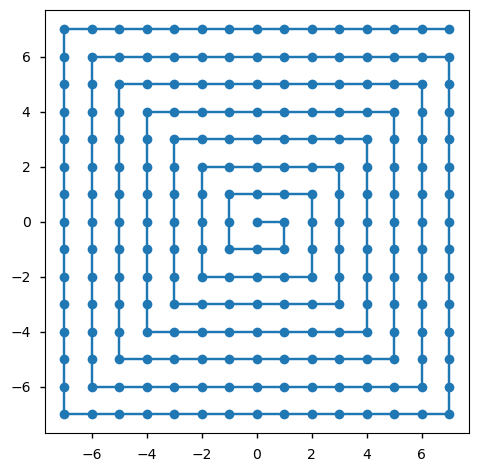

In [ ]:
N = 15**2
p = krata()
punkty = [next(p) for _ in range(N)]
X, Y = zip(*punkty)
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(X, Y, marker='o');

##  Uwaga o terminologii

* Społeczność Pythona często traktuje terminy *iterator* i *generator* jak synonimy.

* Terminologię dla tego wykładu zaczerpnąłem z książki L. Ramahlo, *Zaawansowany Python*.

* [Python Glossary](https://docs.python.org/3/glossary.html#term-generator) *generatorem* nazywa funkcję zawierającą `yield`. Obiekt zwracany przez tę funkcję nazywany jest *iteratorem generatorem*.



## Do poczytania

[A. Kuchling, *Functional Programming HOWTO*](https://docs.python.org/3/howto/functional.html)